In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [19]:
df = pd.read_csv('Product (1).csv')
df1 = pd.read_csv('Region.csv',delimiter= "\t")


In [20]:
# Product.csv

df = pd.read_csv("Product (1).csv")
df.head()

,ProductKey,Product,Standard Cost,Color,Subcategory,Category,Background Color Format,Font Color Format
0,210,HL Road Frame - Black 58,$868.63,Black,Road Frames,Components,#000000,#FFFFFF
1,215,Sport-100 Helmet Black,$12.03,Black,Helmets,Accessories,#000000,#FFFFFF
2,216,Sport-100 Helmet Black,$13.88,Black,Helmets,Accessories,#000000,#FFFFFF
3,217,Sport-100 Helmet Black,$13.09,Black,Helmets,Accessories,#000000,#FFFFFF
4,253,LL Road Frame - Black 58,$176.2,Black,Road Frames,Components,#000000,#FFFFFF


In [22]:
# Product 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ProductKey               397 non-null    int64 
 1   Product                  397 non-null    object
 2   Standard Cost            397 non-null    object
 3   Color                    341 non-null    object
 4   Subcategory              397 non-null    object
 5   Category                 397 non-null    object
 6   Background Color Format  397 non-null    object
 7   Font Color Format        397 non-null    object
dtypes: int64(1), object(7)
memory usage: 24.9+ KB


In [28]:
# Remove Background color and Fornt color Columns 
df.drop(['Background Color Format'], axis=1,inplace=True)

In [30]:
# Remove Background color and Fornt color Columns 
df.drop(['Font Color Format'], axis=1,inplace=True)

In [34]:
# Remove Background color and Fornt color Columns 
df.drop(['Color'], axis=1,inplace=True)

In [35]:
df.describe()

,ProductKey
count,397.000000
mean,408.000000
std,114.748275
min,210.000000
25%,309.000000
50%,408.000000
75%,507.000000
max,606.000000


In [36]:
# Check Missing Value
df.isnull().sum()

ProductKey       0
Product          0
Standard Cost    0
Subcategory      0
Category         0
dtype: int64

In [45]:
# Convert to string, remove dollar signs and commas, then convert to float
df['Standard Cost'] = df['Standard Cost'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

print(df['Standard Cost'].head())
print(df['Standard Cost'].dtype)

0    868.63
1     12.03
2     13.88
3     13.09
4    176.20
Name: Standard Cost, dtype: float64
float64


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\2691498642.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Standard Cost'] = df['Standard Cost'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [100]:
# Save DataFrame to a CSV file
df.to_csv('cl_Product.csv', index=False)

##  Perform exploratory data analysis (EDA) to understand the key features and patterns.

## Total Standard Cost

In [65]:
# 1. Total Standard Cost
total_cost = df['Standard Cost'].sum()

print(f"Total Standard Cost: {total_cost:,.2f}")

Total Standard Cost: 173,418.76


## Average Standard Cost

In [66]:
# 2. Average Standard Cost
average_cost = df['Standard Cost'].mean()
print(f"Average Standard Cost: {average_cost:,.2f}")

Average Standard Cost: 436.82


## Total Number of Products

In [67]:
# 3. Total Number of Products
total_products = df['ProductKey'].nunique()
print(f"Total Products: {total_products}")

Total Products: 397


##  Products by Subcategory

In [68]:
# 4. Products by Subcategory
products_per_subcategory = df['Subcategory'].value_counts()
print("\nProducts by Subcategory:\n", products_per_subcategory)


Products by Subcategory:
 Subcategory
Road Frames          70
Road Bikes           65
Mountain Frames      40
Mountain Bikes       38
Touring Bikes        22
Touring Frames       18
Jerseys              16
Wheels               14
Handlebars           14
Tires and Tubes      11
Saddles               9
Helmets               9
Gloves                9
Shorts                7
Pedals                7
Socks                 4
Bib-Shorts            3
Bottles and Cages     3
Vests                 3
Bottom Brackets       3
Lights                3
Forks                 3
Tights                3
Headsets              3
Cranksets             3
Caps                  3
Brakes                2
Derailleurs           2
Pumps                 2
Locks                 1
Bike Stands           1
Fenders               1
Cleaners              1
Bike Racks            1
Chains                1
Panniers              1
Hydration Packs       1
Name: count, dtype: int64


## Average Cost per Subcategory

In [69]:
# 5. Average Cost per Subcategory
avg_cost_per_subcategory = df.groupby('Subcategory')['Standard Cost'].mean()

print("\nAverage Cost per Subcategory:\n", avg_cost_per_subcategory)


Average Cost per Subcategory:
 Subcategory
Bib-Shorts            37.120000
Bike Racks            44.880000
Bike Stands           59.470000
Bottles and Cages      2.990000
Bottom Brackets       40.953333
Brakes                47.290000
Caps                   5.953333
Chains                 8.990000
Cleaners               2.970000
Cranksets            123.873333
Derailleurs           47.275000
Fenders                8.220000
Forks                 81.873333
Gloves                11.513333
Handlebars            31.821429
Headsets              38.660000
Helmets               13.000000
Hydration Packs       20.570000
Jerseys               35.215000
Lights                12.920000
Locks                 10.310000
Mountain Bikes       961.885526
Mountain Frames      447.116500
Panniers              51.560000
Pedals                28.425714
Pumps                  9.280000
Road Bikes           881.709692
Road Frames          436.074429
Saddles               17.596667
Shorts                25.362

# Visualization

## Plot Products by Subcategory

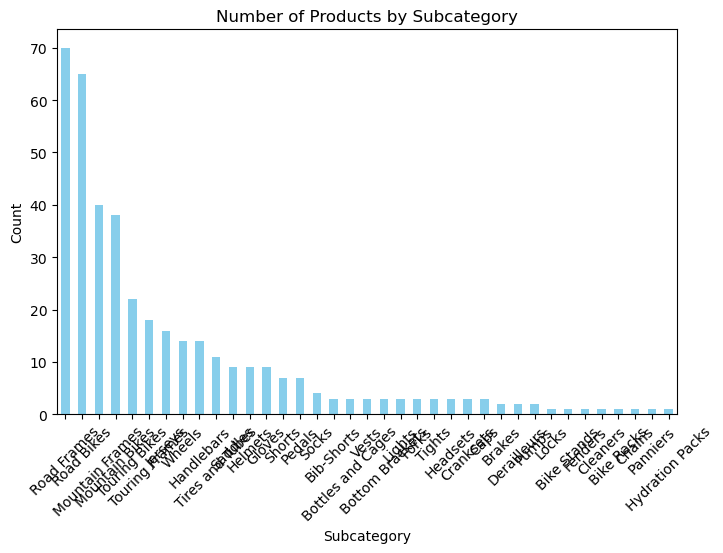

In [70]:
# Plot Products by Subcategory
products_per_subcategory.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Number of Products by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##  Plot Average Cost per Subcategory

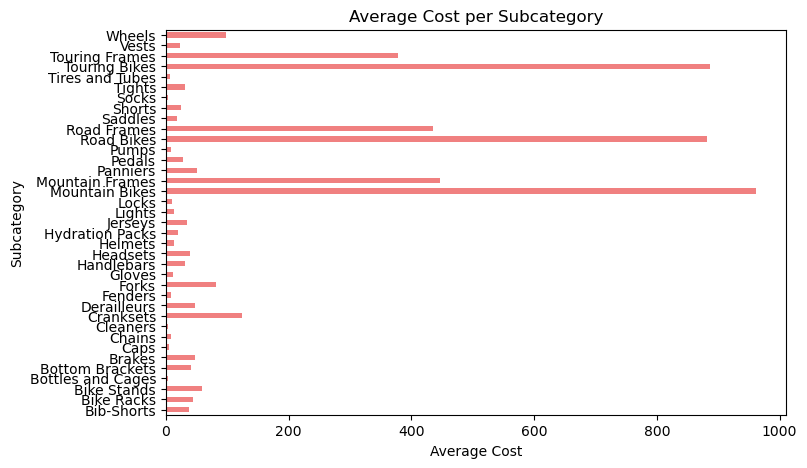

In [71]:
# Plot Average Cost per Subcategory
avg_cost_per_subcategory.plot(kind='barh', color='lightcoral', figsize=(8, 5))
plt.title('Average Cost per Subcategory')
plt.xlabel('Average Cost')
plt.ylabel('Subcategory')
plt.show()

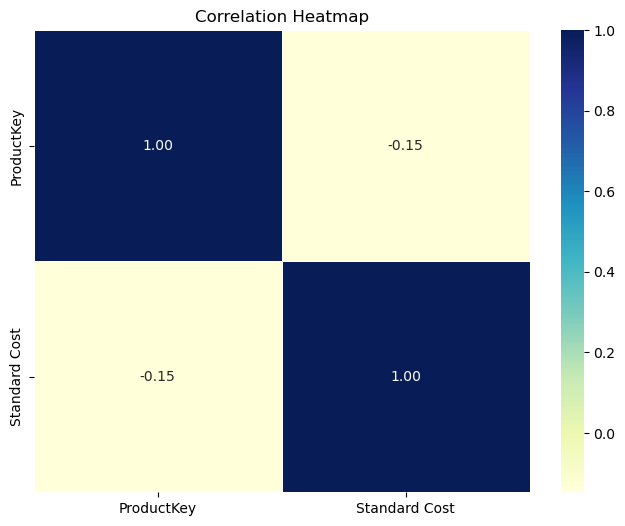

In [75]:
# Select only numerical columns for heatmap
numerical_df = df[['ProductKey', 'Standard Cost']]

# Create correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Import required libraries
import pandas as pd

# Load the dataset (replace 'your_file.csv' with your actual file path)
df = pd.read_csv('your_file.csv')

# Convert 'Standard Cost' to numeric after removing dollar signs and commas
df['Standard Cost'] = df['Standard Cost'].replace('[\$,]', '', regex=True).astype(float)

# 1. Total Standard Cost
total_cost = df['Standard Cost'].sum()

# 2. Average Standard Cost
average_cost = df['Standard Cost'].mean()

# 3. Total Number of Products
total_products = df['ProductKey'].nunique()

# 4. Products by Subcategory
products_per_subcategory = df['Subcategory'].value_counts()

# 5. Average Cost per Subcategory
avg_cost_per_subcategory = df.groupby('Subcategory')['Standard Cost'].mean()

# Print KPIs
print(f"Total Standard Cost: ${total_cost:,.2f}")
print(f"Average Standard Cost: ${average_cost:,.2f}")
print(f"Total Products: {total_products}")
print("\nProducts by Subcategory:\n", products_per_subcategory)
print("\nAverage Cost per Subcategory:\n", avg_cost_per_subcategory)


# Region csv

In [21]:
# Region.csv
df1.head()

,SalesTerritoryKey,Region,Country,Group
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesTerritoryKey  10 non-null     int64 
 1   Region             10 non-null     object
 2   Country            10 non-null     object
 3   Group              10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


In [49]:
df.describe()

,ProductKey,Standard Cost
count,397.000000,397.000000
mean,408.000000,436.823073
std,114.748275,497.343079
min,210.000000,0.860000
25%,309.000000,37.120000
50%,408.000000,204.630000
75%,507.000000,660.910000
max,606.000000,2171.290000


In [50]:
# Check missing value
df1.isnull().sum()

SalesTerritoryKey    0
Region               0
Country              0
Group                0
dtype: int64

In [ ]:
# Save DataFrame to a CSV file
df1.to_csv('cl_BegInvFINAL12312016.csv', index=False)

## # Perform exploratory data analysis (EDA) to understand the key features and patterns.

## Total Sales Territories

In [76]:
# 1. Total Sales Territories
total_territories = df1['SalesTerritoryKey'].nunique()
print(f"Total Sales Territories: {total_territories}")

Total Sales Territories: 10


## Number of Unique Regions

In [77]:
# 2. Number of Unique Regions
total_regions = df1['Region'].nunique()
print(f"Total Unique Regions: {total_regions}")

Total Unique Regions: 10


## Regions Distribution by Group

In [78]:
# 3. Regions Distribution by Group
regions_per_group = df1['Group'].value_counts()
print("\nRegions Distribution by Group:\n", regions_per_group)


Regions Distribution by Group:
 Group
North America    6
Europe           3
Pacific          1
Name: count, dtype: int64


## Region-wise Count

In [79]:
# 4. Region-wise Count
region_count = df1['Region'].value_counts()
print("\nRegion-wise Count:\n", region_count)


Region-wise Count:
 Region
Northwest         1
Northeast         1
Central           1
Southwest         1
Southeast         1
Canada            1
France            1
Germany           1
Australia         1
United Kingdom    1
Name: count, dtype: int64


# Visualization

## region-wise count

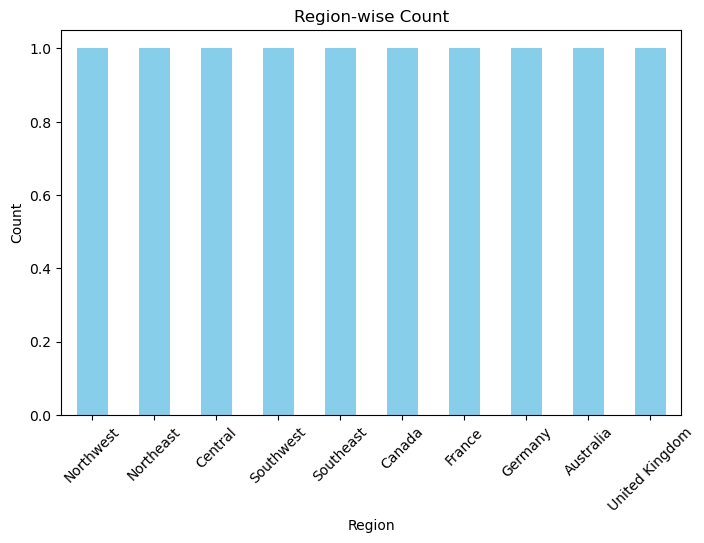

In [80]:
# Plot region-wise count
plt.figure(figsize=(8, 5))
region_count.plot(kind='bar', color='skyblue')
plt.title('Region-wise Count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Regions Distribution by Group

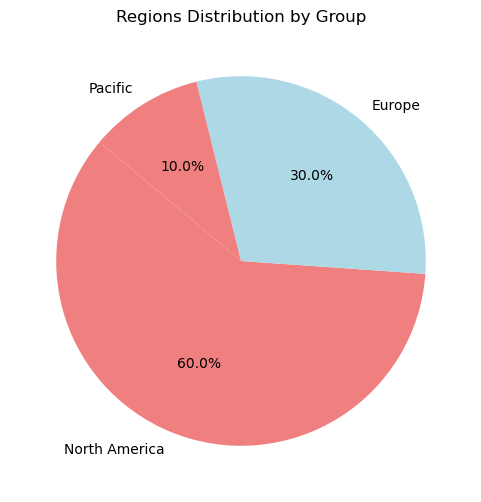

In [81]:
# Plot group-wise region distribution
plt.figure(figsize=(6, 6))
regions_per_group.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title('Regions Distribution by Group')
plt.ylabel('')
plt.show()

## Region Distribution by Group

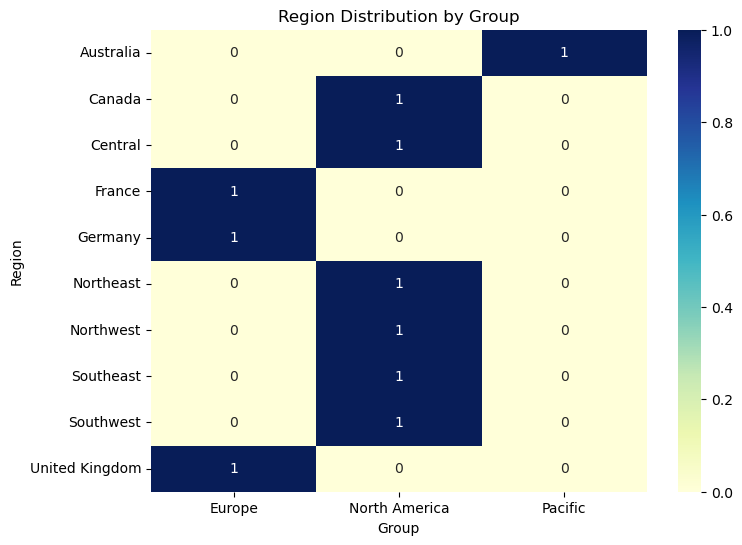

In [82]:
# Create a pivot table to count regions per group
pivot_table = df1.pivot_table(index='Region', columns='Group', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Region Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Region')
plt.show()

# Sales Dataset

In [18]:
df2 = pd.read_csv("Sales.csv.zip",delimiter= "\t")
df2.head()

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost
0,SO43897,"Friday, August 25, 2017",235,312,282,4,2,$28.84,$57.68,$63.45
1,SO43897,"Friday, August 25, 2017",351,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19"
2,SO43897,"Friday, August 25, 2017",348,312,282,4,2,"$2,024.99","$4,049.98","$3,796.19"
3,SO43897,"Friday, August 25, 2017",232,312,282,4,2,$28.84,$57.68,$63.45
4,SO44544,"Saturday, November 18, 2017",292,312,282,4,2,$818.7,"$1,637.4","$1,413.62"


In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57851 entries, 0 to 57850
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesOrderNumber   57851 non-null  object
 1   OrderDate          57851 non-null  object
 2   ProductKey         57851 non-null  int64 
 3   ResellerKey        57851 non-null  int64 
 4   EmployeeKey        57851 non-null  int64 
 5   SalesTerritoryKey  57851 non-null  int64 
 6   Quantity           57851 non-null  int64 
 7   Unit Price         57851 non-null  object
 8   Sales              57851 non-null  object
 9   Cost               57851 non-null  object
dtypes: int64(5), object(5)
memory usage: 4.4+ MB


In [52]:
# Describe
df2.describe()

,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity
count,57851.000000,57851.000000,57851.000000,57851.000000,57851.000000
mean,408.636705,340.742978,286.131735,4.554424,3.528271
std,113.665645,205.493906,4.521832,2.412247,3.035766
min,212.000000,1.000000,272.000000,1.000000,1.000000
25%,326.000000,166.000000,283.000000,3.000000,2.000000
50%,401.000000,327.000000,285.000000,4.000000,3.000000
75%,491.000000,514.000000,290.000000,6.000000,4.000000
max,606.000000,701.000000,296.000000,10.000000,44.000000


In [54]:
# Convert 'OrderDate' to datetime format
df2['OrderDate'] = pd.to_datetime(df2['OrderDate'])
df2['OrderDate'].head()

0   2017-08-25
1   2017-08-25
2   2017-08-25
3   2017-08-25
4   2017-11-18
Name: OrderDate, dtype: datetime64[ns]

In [59]:
# Convert to string, remove dollar signs and commas, then convert to float
df2['Unit Price'] = df2['Unit Price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

print(df2['Unit Price'].head())
print(df2['Unit Price'].dtype)

0      28.84
1    2024.99
2    2024.99
3      28.84
4     818.70
Name: Unit Price, dtype: float64
float64


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\3541261189.py:2: SyntaxWarning: invalid escape sequence '\$'
  df2['Unit Price'] = df2['Unit Price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [60]:
# Convert to string, remove dollar signs and commas, then convert to float
df2['Sales'] = df2['Sales'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

print(df2['Sales'].head())
print(df2['Sales'].dtype)

0      57.68
1    4049.98
2    4049.98
3      57.68
4    1637.40
Name: Sales, dtype: float64
float64


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\3957239212.py:2: SyntaxWarning: invalid escape sequence '\$'
  df2['Sales'] = df2['Sales'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [61]:
# Convert to string, remove dollar signs and commas, then convert to float
df2['Cost'] = df2['Cost'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

print(df2['Cost'].head())
print(df2['Cost'].dtype)

0      63.45
1    3796.19
2    3796.19
3      63.45
4    1413.62
Name: Cost, dtype: float64
float64


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\2508116797.py:2: SyntaxWarning: invalid escape sequence '\$'
  df2['Cost'] = df2['Cost'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


##  Perform exploratory data analysis (EDA) to understand the key features and patterns.

## Total Sales Amount

In [83]:
# 1. Total Sales Amount
total_sales = df2['Sales'].sum()
print(f"Total Sales Amount: {total_sales:,.2f}")

Total Sales Amount: 77,548,570.20


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_file.csv' with the actual file path)
df = pd.read_csv('your_file.csv')

# Convert relevant columns to numeric after removing dollar signs and commas
df['Unit Price'] = df['Unit Price'].replace('[\$,]', '', regex=True).astype(float)
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)
df['Cost'] = df['Cost'].replace('[\$,]', '', regex=True).astype(float)

# 1. Total Sales Amount
total_sales = df['Sales'].sum()

# 2. Total Cost Amount
total_cost = df['Cost'].sum()

# 3. Total Quantity Sold
total_quantity = df['Quantity'].sum()

# 4. Average Sales per Order
avg_sales_per_order = df.groupby('SalesOrderNumber')['Sales'].sum().mean()

# 5. Profit Margin
profit_margin = ((total_sales - total_cost) / total_sales) * 100

# Print KPIs
print(f"Total Sales Amount: ${total_sales:,.2f}")
print(f"Total Cost Amount: ${total_cost:,.2f}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Average Sales per Order: ${avg_sales_per_order:,.2f}")
print(f"Profit Margin: {profit_margin:.2f}%")


## Total Cost Amount

In [85]:
# 2. Total Cost Amount
total_cost = df2['Cost'].sum()
print(f"Total Cost Amount: {total_cost:,.2f}")

Total Cost Amount: 76,549,075.63


## Total Quantity Sold

In [87]:
# 3. Total Quantity Sold
total_quantity = df2['Quantity'].sum()
print(f"Total Quantity Sold: {total_quantity}")

Total Quantity Sold: 204114


## Average Sales per Order

In [90]:
# 4. Average Sales per Order
avg_sales_per_order = df2.groupby('SalesOrderNumber')['Sales'].sum().mean()
print(f"Average Sales per Order: {avg_sales_per_order:,.2f}")

Average Sales per Order: 21,445.95


## Profit Margin

In [92]:
# 5. Profit Margin
profit_margin = ((total_sales - total_cost) / total_sales) * 100
print(f"Profit Margin: {profit_margin:.2f}%")

Profit Margin: 1.29%


# Visualization

## Total Sales vs. Total Cost

C:\Users\Admin\AppData\Local\Temp\ipykernel_8740\2113312490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Sales', 'Cost'], y=[total_sales, total_cost], palette=['green', 'red'])


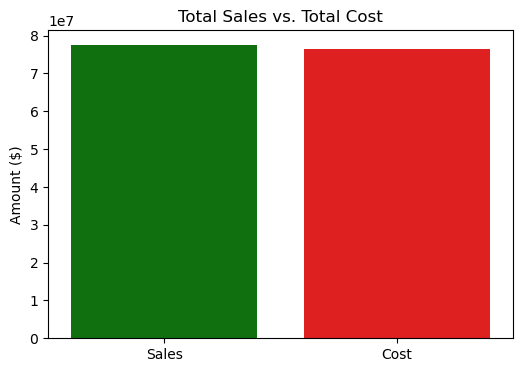

In [94]:
# Plot Sales vs. Cost
plt.figure(figsize=(6, 4))
sns.barplot(x=['Sales', 'Cost'], y=[total_sales, total_cost], palette=['green', 'red'])
plt.title('Total Sales vs. Total Cost')
plt.ylabel('Amount ($)')
plt.show()

## Sales per Order

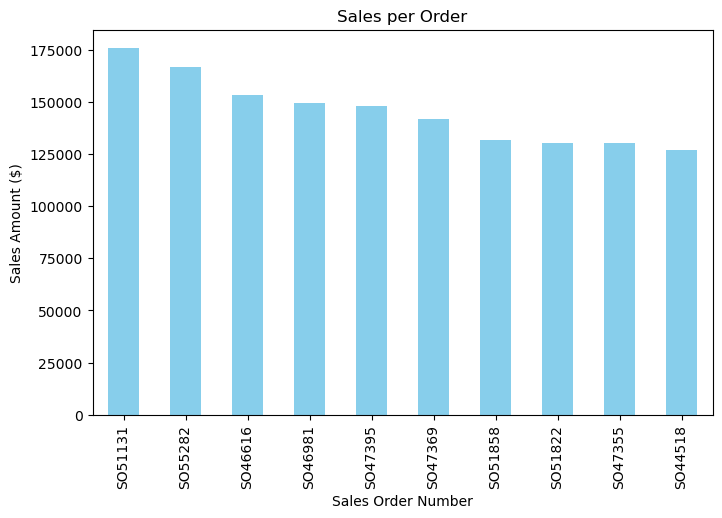

In [97]:
# Group Sales by Order
sales_per_order = df2.groupby('SalesOrderNumber')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot Sales by Order
plt.figure(figsize=(8, 5))
sales_per_order.plot(kind='bar', color='skyblue')
plt.title('Sales per Order')
plt.xlabel('Sales Order Number')
plt.ylabel('Sales Amount ($)')
# plt.xticks(rotation=45)
plt.show()

## Sales Trend Over Time

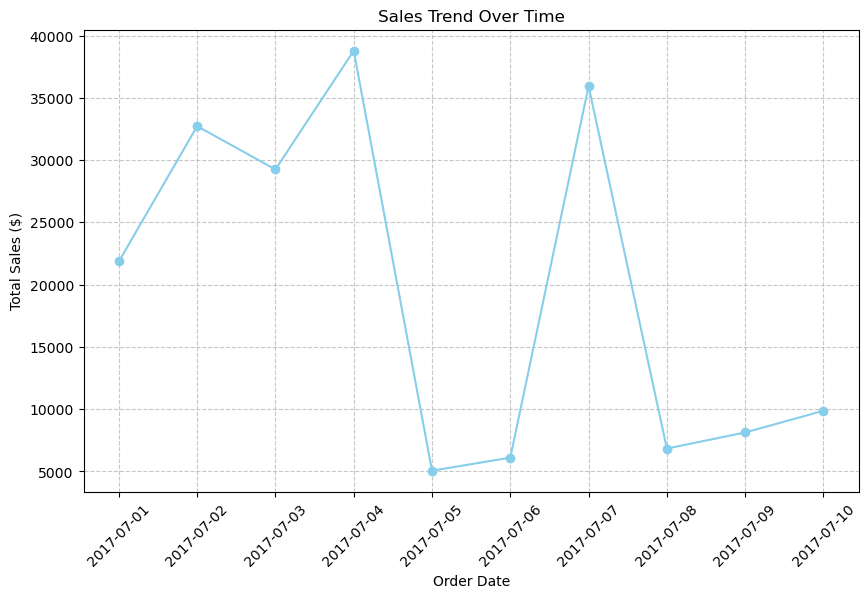

In [99]:
# Group sales by OrderDate
sales_by_date = df2.groupby('OrderDate')['Sales'].sum().reset_index().head(10)

# Plot Line Chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['OrderDate'], sales_by_date['Sales'], marker='o', color='skyblue', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()